## Notebook resume

The sensitivity matrix of the equivalent layer linear system for magnetic data is given by:

$A = cte \, \hat{F}^T \, H \, \hat{h} $

where: $\hat{F}^T = [cos(I) cos(D) \quad cos(I)sen(D) \quad sen(I)] \,$ is the cosine directions of the main magnetic field and

$\hat{h} =\begin{bmatrix}
	cos(i) cos(d)\\
	cos(i)sen(d)\\ 
	sen(i)
	\end{bmatrix}\,$ is the cosine directions of the equivalent sources magnetizations.

$H = \pmatrix{H^{xx} & H^{xy} & H^{xz} \\ H^{xy} & H^{yy} & H^{yz} \\ H^{xz} & H^{yz} & H^{zz}}$

$H^{xx}$: Symmetric (symmetric BT - symmetric TB)

$H^{xy}$: Symmetric (skew symmetric BT - skew symmetric TB)

$H^{xz}$: Skew-symmetric (skew symmetric BT - symmetric TB)

$H^{yy}$: Symmetric (symmetric BT - symmetric TB)

$H^{yz}$: Skew-symmetric (symmetric BT - skew symmetric TB)

$H^{zz}$: Symmetric (symmetric BT - symmetric TB)

$A$: in general Nonsymmetric (nonsymmetric BT - nonsymmetric TB)

Symmetric BTTB and skew symmetric BTTB matrices can be entirely described by theirs first row or first column.

If we consider that $cte$, $F^T$ and $\hat{h}$ are constants that are multiplying the second derivatives of the harmonic funtion $1/r$, the sensibility matrix $A$ is purely the sum of the components $H_{xx} + H_{xy} + H_{xz} + H_{xy} + H_{yy} + H_{yz} + H_{xz} + H_{yz} + H_{zz}$ multiplied by the respectives constants of each component.

Thus, despite $A$ be neither symmetric BTTB matrix or skew-symmetric, it can be, in fact, written by calculating only the first row or column of these components.

Under specific circumstances, when the magnetic main field and the souces magnetizations have particulars directions of Inclination and declination, the $A$ matrix can have different structures.

Examples of structures that the matrix $A$ can take:

If $I, i = 0°$ then, $A$ is Symmetric (nonsymmetric BT - nonsymmetric TB)

If $I, i = 90°$ then, $A$ is Symmetric (symmetric BT - symmetric TB)

If $I = 90°, i = 0°$ then, $A$ is Skew-symmetric (nonsymmetric BT - nonsymmetric TB)

If $I = 90°, i = 0°, d = 0°$ then, $A$ is Skew-symmetric (skew-symmetric BT - symmetric TB)

## Import

In [1]:
import numpy as np
import functions_fatiando as ft
from timeit import default_timer as time
from matplotlib import pyplot as plt
%matplotlib inline

## Y-oriented observation and equivalent layer grids

In [4]:
# Create a regular grid at 0m height
area = [1, 3, 1, 4]
#area = [0, 800, 0, 800]
#area = [-5000., 5000., -4000., 4000.]
#shape = (50, 50)
shape = (3, 2)
xi, yi, zi = ft.gridder_regular(area, shape, z=0.)

# Equivalent Layer
areaj = [1, 3,1, 4]
#areaj = [0, 800, 0, 800]
#areaj = [-5000., 5000., -4000., 4000.]
#shapej = (50, 50)
shapej = (3, 2)
xj, yj, zj = ft.gridder_regular(areaj, shapej, z=10.)

N = shape[0]*shape[1]
M = shapej[0]*shapej[1]

In [20]:
zj

array([10., 10., 10., 10., 10., 10.])

## Y-oriented full magnetic equivalent layer sensitivity matrix construction

In [6]:
# Magnetic Configuration
inc0 = np.deg2rad(90.)
dec0 = np.deg2rad(20.)
inc = np.deg2rad(90.)
dec = np.deg2rad(10)
F = np.array([np.cos(inc0)*np.cos(dec0), np.cos(inc0)*np.sin(dec0), np.sin(inc0)])
h = np.array([np.cos(inc)*np.cos(dec), np.cos(inc)*np.sin(dec), np.sin(inc)])

# Calculo da matriz de sensibilidade
X = np.empty((N, M), dtype=np.float)
Y = np.empty((N, M), dtype=np.float)
Z = np.empty((N, M), dtype=np.float)
A = np.empty((N, M), dtype=np.float)
Axx = np.empty((N, M), dtype=np.float)
Axy = np.empty((N, M), dtype=np.float)
Axz = np.empty((N, M), dtype=np.float)
Ayy = np.empty((N, M), dtype=np.float)
Ayz = np.empty((N, M), dtype=np.float)
Azz = np.empty((N, M), dtype=np.float)

s = time()
for i in range (N):
    a = (xj-xi[i])
    b = (yj-yi[i])
    c = (zj-zi[i])
    r = (a*a+b*b+c*c)
    r3 = r**(-1.5)
    r5 = r**(2.5)
    Hxx = -r3+3*(a*a)/r5
    Hxy = 3*(a*b)/r5
    Hxz = 3*(a*c)/r5
    Hyy = -r3+3*(b*b)/r5
    Hyz = 3*(b*c)/r5
    Hzz = -r3+3*(c*c)/r5
    A[i] = ((F[0]*Hxx+F[1]*Hxy+F[2]*Hxz)*h[0] + (F[0]*Hxy+F[1]*Hyy+F[2]*Hyz)*h[1] + (F[0]*Hxz+F[1]*Hyz+F[2]*Hzz)*h[2])
    Axx[i] = Hxx
    Axy[i] = Hxy
    Axz[i] = Hxz
    Ayy[i] = Hyy
    Ayz[i] = Hyz
    Azz[i] = Hzz

e = time()
tcpu = e - s
print (tcpu)
print (A.nbytes/(1024.*1024.))

0.0006100999999603118
0.000274658203125


### Plot A

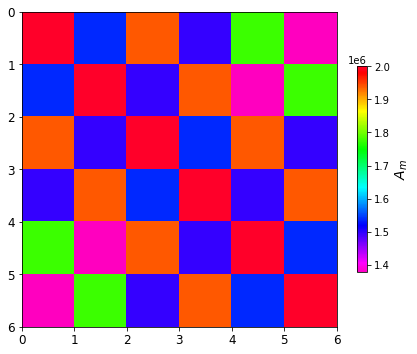

In [7]:
xt = np.arange(0,M+1,1)
yt = np.arange(0,N+1,1)
yt, xt = np.meshgrid(xt,yt)

plt.figure(figsize=(6,5))
plt.pcolormesh(yt, xt, A*(10**9), cmap='gist_rainbow_r')
cb = plt.colorbar(shrink=0.65)
plt.axis('scaled')
cb.set_label('$A_m$', rotation=90, fontsize=14)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#plt.savefig('figures/sensibility_mag.jpg', dpi=300)

In [13]:
np.allclose(A, A.T, atol=1e-15)

True

In [14]:
# verify if the whole matrix is symmetric
print (np.allclose(A[0], A[:,0], atol=1e-15))

# verify if the whole matrix is skew-symmetric
print (np.allclose(A[0], -A[:,0], atol=1e-15))

# verify if the blocks of the matrix are symmetric
print (np.allclose(A[0,shape[1]:2*shape[1]], A[0:shape[1],shape[1]], atol=1e-15))

# verify if the blocks of the matrix are skew-symmetric
print (np.allclose(A[0,shape[1]:2*shape[1]], -A[0:shape[1],shape[1]], atol=1e-15))

# verify if the whole matrix is symmetric by blocks
print (np.allclose(A[shape[1]:2*shape[1],:shape[1]], A[:shape[1],shape[1]:2*shape[1]], atol=1e-15))

# verify if the whole matrix is skew-symmetric by blocks
print (np.allclose(A[shape[1]:2*shape[1],:shape[1]], -A[:shape[1],shape[1]:2*shape[1]], atol=1e-15))

True
False
True
False
True
False


### Plot Hxx

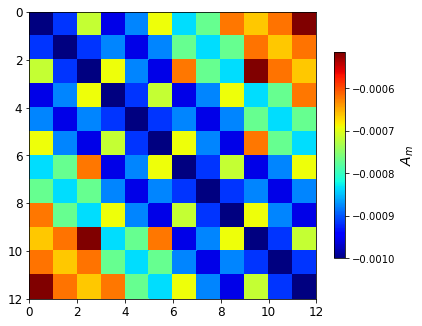

In [15]:
xt = np.arange(0,M+1,1)
yt = np.arange(0,N+1,1)
yt, xt = np.meshgrid(xt, yt)

plt.figure(figsize=(6,5))
plt.pcolormesh(yt, xt, Axx, cmap='jet')
cb = plt.colorbar(shrink=0.65)
plt.axis('scaled')
cb.set_label('$A_m$', rotation=90, fontsize=14)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#plt.savefig('figures/sensibility_mag.jpg', dpi=300)

In [16]:
# verify if the matrix is symmetric
print (np.allclose(Axx[0], Axx[:,0], atol=1e-15))

# verify if the matrix is skew-symmetric
print (np.allclose(Axx[0], -Axx[:,0], atol=1e-15))

# verify if the blocks matrix are symmetric
print (np.allclose(Axx[0,shape[1]:2*shape[1]], Axx[0:shape[1],shape[1]], atol=1e-15))

# verify if the blocks matrix are skew-symmetric
print (np.allclose(Axx[0,shape[1]:2*shape[1]], -Axx[0:shape[1],shape[1]], atol=1e-15))

# verify if the matrix is symmetric by blocks
print (np.allclose(Axx[shape[1]:2*shape[1],:shape[1]], Axx[:shape[1],shape[1]:2*shape[1]], atol=1e-15))

# verify if the matrix is skew-symmetric by blocks
print (np.allclose(Axx[shape[1]:2*shape[1],:shape[1]], -Axx[:shape[1],shape[1]:2*shape[1]], atol=1e-15))

True
False
True
False
True
False


### Plot Hxy

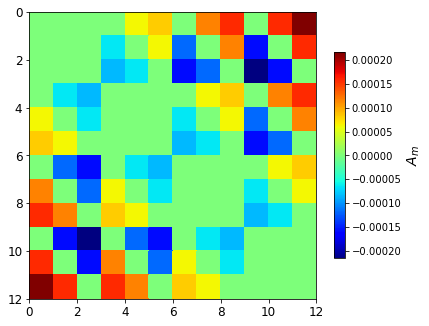

In [17]:
xt = np.arange(0,M+1,1)
yt = np.arange(0,N+1,1)
yt, xt = np.meshgrid(xt,yt)

plt.figure(figsize=(6,5))
plt.pcolormesh(yt, xt, Axy, cmap='jet')
cb = plt.colorbar(shrink=0.65)
plt.axis('scaled')
cb.set_label('$A_m$', rotation=90, fontsize=14)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#plt.savefig('figures/sensibility_mag.jpg', dpi=300)

In [65]:
# verify if the matrix is symmetric
print (np.allclose(Axy[0], Axy[:,0], atol=1e-15))

# verify if the matrix is skew-symmetric
print (np.allclose(Axy[0], -Axy[:,0], atol=1e-15))

# verify if the blocks matrix are symmetric
print (np.allclose(Axy[0,shape[1]:2*shape[1]], Axy[0:shape[1],shape[1]], atol=1e-15))

# verify if the blocks matrix are skew-symmetric
print (np.allclose(Axy[0,shape[1]:2*shape[1]], -Axy[0:shape[1],shape[1]], atol=1e-15))

# verify if the matrix is symmetric by blocks
print (np.allclose(Axy[shape[1]:2*shape[1],:shape[1]], Axy[:shape[1],shape[1]:2*shape[1]], atol=1e-15))

# verify if the matrix is skew-symmetric by blocks
print (np.allclose(Axy[shape[1]:2*shape[1],:shape[1]], -Axy[:shape[1],shape[1]:2*shape[1]], atol=1e-15))

True
False
False
True
False
True


### Plot Hxz

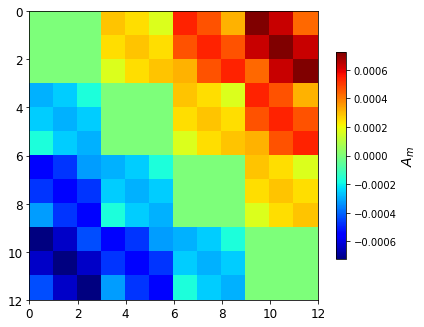

In [66]:
xt = np.arange(0,M+1,1)
yt = np.arange(0,N+1,1)
yt, xt = np.meshgrid(xt,yt)

plt.figure(figsize=(6,5))
plt.pcolormesh(yt, xt, Axz, cmap='jet')
cb = plt.colorbar(shrink=0.65)
plt.axis('scaled')
cb.set_label('$A_m$', rotation=90, fontsize=14)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#plt.savefig('figures/sensibility_mag.jpg', dpi=300)

In [67]:
# verify if the matrix is symmetric
print (np.allclose(Axz[0], Axz[:,0], atol=1e-15))

# verify if the matrix is skew-symmetric
print (np.allclose(Axz[0], -Axz[:,0], atol=1e-15))

# verify if the blocks matrix are symmetric
print (np.allclose(Axz[0,shape[1]:2*shape[1]], Axz[0:shape[1],shape[1]], atol=1e-15))

# verify if the blocks matrix are skew-symmetric
print (np.allclose(Axz[0,shape[1]:2*shape[1]], -Axz[0:shape[1],shape[1]], atol=1e-15))

# verify if the matrix is symmetric by blocks
print (np.allclose(Axz[shape[1]:2*shape[1],:shape[1]], Axz[:shape[1],shape[1]:2*shape[1]], atol=1e-15))

# verify if the matrix is skew-symmetric by blocks
print (np.allclose(Axz[shape[1]:2*shape[1],:shape[1]], -Axz[:shape[1],shape[1]:2*shape[1]], atol=1e-15))

False
True
True
False
False
True


### Plot Hyy

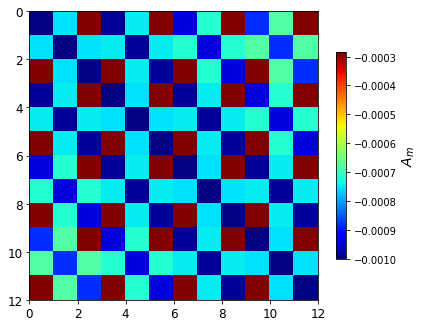

In [68]:
xt = np.arange(0,M+1,1)
yt = np.arange(0,N+1,1)
yt, xt = np.meshgrid(xt,yt)

plt.figure(figsize=(6,5))
plt.pcolormesh(yt, xt, Ayy, cmap='jet')
cb = plt.colorbar(shrink=0.65)
plt.axis('scaled')
cb.set_label('$A_m$', rotation=90, fontsize=14)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#plt.savefig('figures/sensibility_mag.jpg', dpi=300)

In [69]:
# verify if the matrix is symmetric
print (np.allclose(Ayy[0], Ayy[:,0], atol=1e-15))

# verify if the matrix is skew-symmetric
print (np.allclose(Ayy[0], -Ayy[:,0], atol=1e-15))

# verify if the blocks matrix are symmetric
print (np.allclose(Ayy[0,shape[1]:2*shape[1]], Ayy[0:shape[1],shape[1]], atol=1e-15))

# verify if the blocks matrix are skew-symmetric
print (np.allclose(Ayy[0,shape[1]:2*shape[1]], -Ayy[0:shape[1],shape[1]], atol=1e-15))

# verify if the matrix is symmetric by blocks
print (np.allclose(Ayy[shape[1]:2*shape[1],:shape[1]], Ayy[:shape[1],shape[1]:2*shape[1]], atol=1e-15))

# verify if the matrix is skew-symmetric by blocks
print (np.allclose(Ayy[shape[1]:2*shape[1],:shape[1]], -Ayy[:shape[1],shape[1]:2*shape[1]], atol=1e-15))

True
False
True
False
True
False


### Plot Hyz

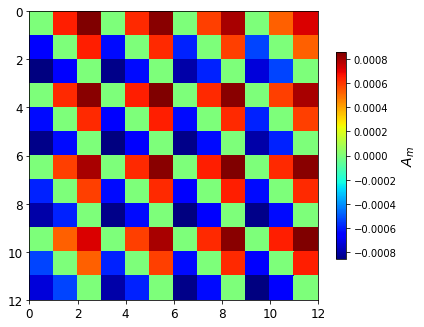

In [70]:
xt = np.arange(0,M+1,1)
yt = np.arange(0,N+1,1)
yt, xt = np.meshgrid(xt,yt)

plt.figure(figsize=(6,5))
plt.pcolormesh(yt, xt, Ayz, cmap='jet')
cb = plt.colorbar(shrink=0.65)
plt.axis('scaled')
cb.set_label('$A_m$', rotation=90, fontsize=14)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#plt.savefig('figures/sensibility_mag.jpg', dpi=300)

In [71]:
# verify if the matrix is symmetric
print (np.allclose(Ayz[0], Ayz[:,0], atol=1e-15))

# verify if the matrix is skew-symmetric
print (np.allclose(Ayz[0], -Ayz[:,0], atol=1e-15))

# verify if the blocks matrix are symmetric
print (np.allclose(Ayz[0,shape[1]:2*shape[1]], Ayz[0:shape[1],shape[1]], atol=1e-15))

# verify if the blocks matrix are skew-symmetric
print (np.allclose(Ayz[0,shape[1]:2*shape[1]], -Ayz[0:shape[1],shape[1]], atol=1e-15))

# verify if the matrix is symmetric by blocks
print (np.allclose(Ayz[shape[1]:2*shape[1],:shape[1]], Ayz[:shape[1],shape[1]:2*shape[1]], atol=1e-15))

# verify if the matrix is skew-symmetric by blocks
print (np.allclose(Ayz[shape[1]:2*shape[1],:shape[1]], -Ayz[:shape[1],shape[1]:2*shape[1]], atol=1e-15))

False
True
False
True
True
False


### Plot Hzz

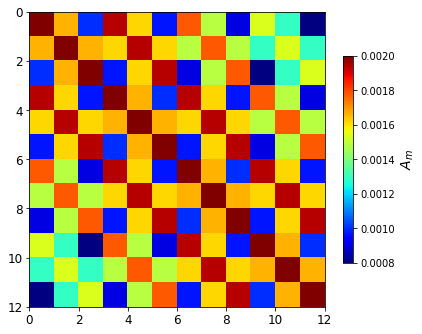

In [72]:
xt = np.arange(0,M+1,1)
yt = np.arange(0,N+1,1)
yt, xt = np.meshgrid(xt,yt)

plt.figure(figsize=(6,5))
plt.pcolormesh(yt, xt, Azz, cmap='jet')
cb = plt.colorbar(shrink=0.65)
plt.axis('scaled')
cb.set_label('$A_m$', rotation=90, fontsize=14)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#plt.savefig('figures/sensibility_mag.jpg', dpi=300)

In [73]:
# verify if the matrix is symmetric
print (np.allclose(Azz[0], Azz[:,0], atol=1e-15))

# verify if the matrix is skew-symmetric
print (np.allclose(Azz[0], -Azz[:,0], atol=1e-15))

# verify if the blocks matrix are symmetric
print (np.allclose(Azz[0,shape[1]:2*shape[1]], Azz[0:shape[1],shape[1]], atol=1e-15))

# verify if the blocks matrix are skew-symmetric
print (np.allclose(Azz[0,shape[1]:2*shape[1]], -Azz[0:shape[1],shape[1]], atol=1e-15))

# verify if the matrix is symmetric by blocks
print (np.allclose(Azz[shape[1]:2*shape[1],:shape[1]], Azz[:shape[1],shape[1]:2*shape[1]], atol=1e-15))

# verify if the matrix is skew-symmetric by blocks
print (np.allclose(Azz[shape[1]:2*shape[1],:shape[1]], -Azz[:shape[1],shape[1]:2*shape[1]], atol=1e-15))

True
False
True
False
True
False


## X-oriented full magnetic equivalent layer sensitivity matrix construction

In [25]:
xi_x = np.ravel(xi.reshape(3,2).T)
yi_x = np.ravel(yi.reshape(3,2).T)
zi_x = np.ravel(zi.reshape(3,2).T)

xj_x = np.ravel(xj.reshape(3,2).T)
yj_x = np.ravel(yj.reshape(3,2).T)
zj_x = np.ravel(zj.reshape(3,2).T)

In [27]:
# Calculo da matriz de sensibilidade
A_x = np.empty((N, M), dtype=np.float)
Axx_x = np.empty((N, M), dtype=np.float)
Axy_x = np.empty((N, M), dtype=np.float)
Axz_x = np.empty((N, M), dtype=np.float)
Ayy_x = np.empty((N, M), dtype=np.float)
Ayz_x = np.empty((N, M), dtype=np.float)
Azz_x = np.empty((N, M), dtype=np.float)

s = time()
for i in range (N):
    a_x = (xj_x-xi_x[i])
    b_x = (yj_x-yi_x[i])
    c_x = (zj_x-zi_x[i])
    r_x = (a_x*a_x+b_x*b_x+c_x*c_x)
    r3_x = r_x**(-1.5)
    r5_x= r_x**(2.5)
    Hxx_x = -r3_x+3*(a_x*a_x)/r5_x
    Hxy_x = 3*(a_x*b_x)/r5_x
    Hxz_x = 3*(a_x*c_x)/r5_x
    Hyy_x = -r3_x+3*(b_x*b_x)/r5_x
    Hyz_x = 3*(b_x*c_x)/r5_x
    Hzz_x = -r3_x+3*(c_x*c_x)/r5_x
    A_x[i] = ((F[0]*Hxx_x+F[1]*Hxy_x+F[2]*Hxz_x)*h[0] + (F[0]*Hxy_x+F[1]*Hyy_x+F[2]*Hyz_x)*h[1] + (F[0]*Hxz_x+F[1]*Hyz_x+F[2]*Hzz_x)*h[2])
    Axx_x[i] = Hxx_x
    Axy_x[i] = Hxy_x
    Axz_x[i] = Hxz_x
    Ayy_x[i] = Hyy_x
    Ayz_x[i] = Hyz_x
    Azz_x[i] = Hzz_x

e = time()
tcpu = e - s
print (tcpu)
print (A_x.nbytes/(1024.*1024.))

0.0006336000000146669
0.000274658203125


### Matriz A x-oriented

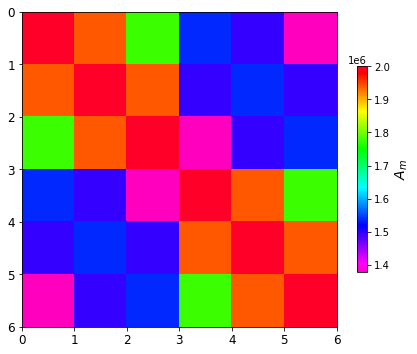

In [28]:
xt = np.arange(0,M+1,1)
yt = np.arange(0,N+1,1)
yt, xt = np.meshgrid(xt,yt)

plt.figure(figsize=(6,5))
plt.pcolormesh(yt, xt, A_x*(10**9), cmap='gist_rainbow_r')
cb = plt.colorbar(shrink=0.65)
plt.axis('scaled')
cb.set_label('$A_m$', rotation=90, fontsize=14)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
#plt.savefig('figures/sensibility_mag.jpg', dpi=300)

### Matrizez H

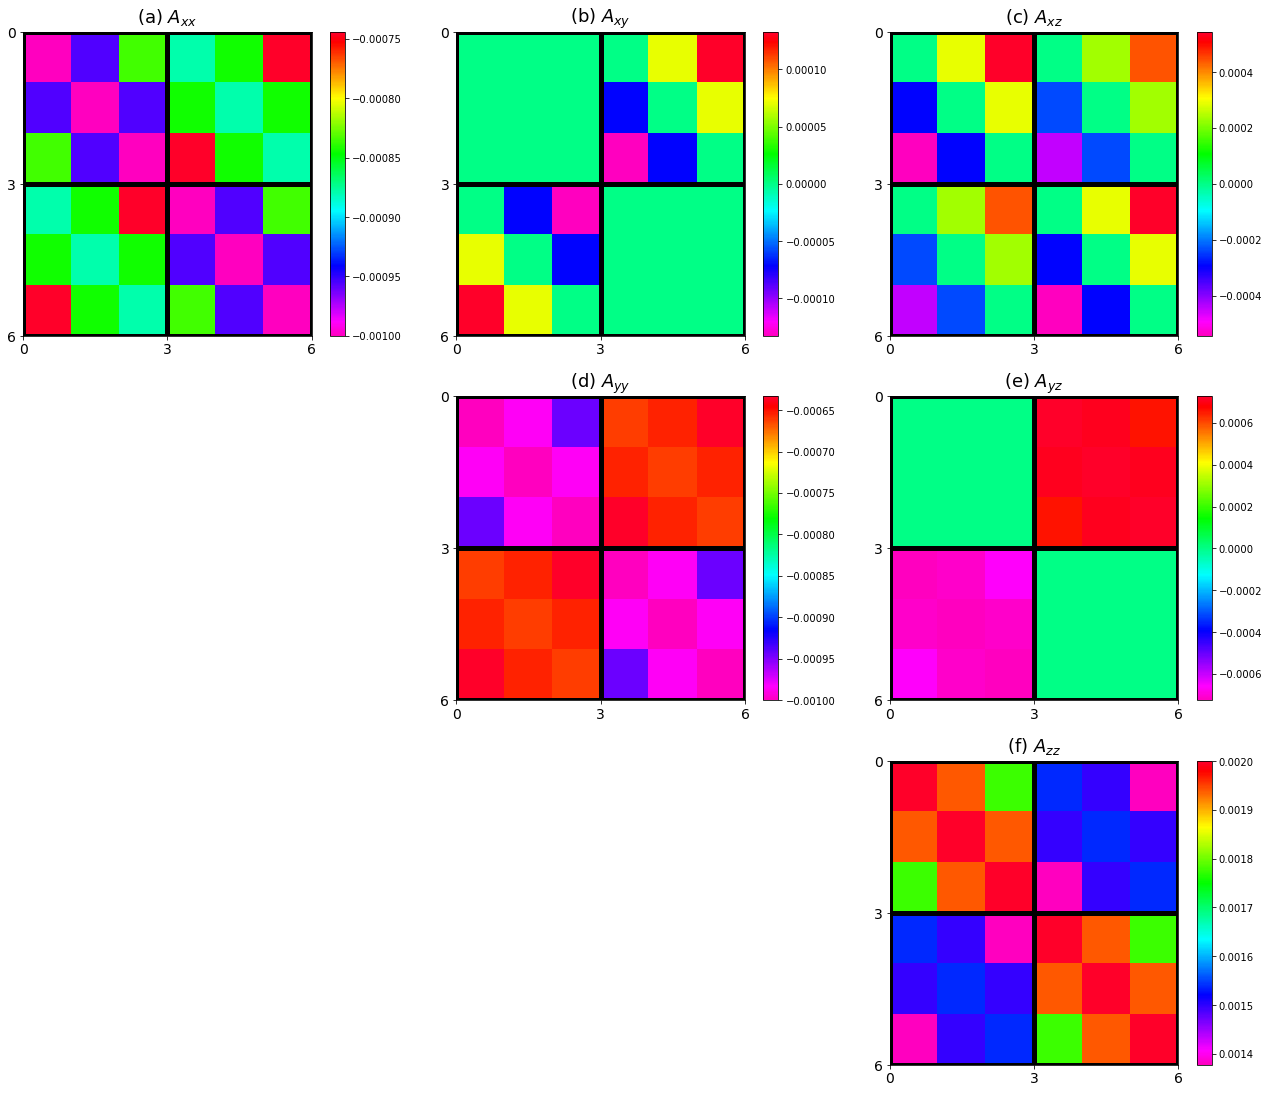

In [75]:
fig = plt.figure(figsize=(22,19))
fig.patch.set_facecolor('xkcd:white')

plt.subplot(331)
plt.title('(a) $A_{xx}$', y=1.01, x=0.5, fontsize=18)
plt.pcolormesh(yt, xt, Axx_x, cmap='gist_rainbow_r')
cb = plt.colorbar(shrink=1)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(np.arange(0, M+1, 3.0), fontsize=14)
plt.yticks(np.arange(0, N+1, 3.0), fontsize=14)
plt.grid(color = 'black', linestyle = '-', linewidth = 5)

plt.subplot(332)
plt.title('(b) $A_{xy}$', y=1.01, x=0.5, fontsize=18)
plt.pcolormesh(yt, xt, Axy_x, cmap='gist_rainbow_r')
cb = plt.colorbar(shrink=1)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(np.arange(0, M+1, 3.0), fontsize=14)
plt.yticks(np.arange(0, N+1, 3.0), fontsize=14)
plt.grid(color = 'black', linestyle = '-', linewidth = 5)

plt.subplot(333)
plt.title('(c) $A_{xz}$', y=1.01, x=0.5, fontsize=18)
plt.pcolormesh(yt, xt, Axz_x, cmap='gist_rainbow_r')
cb = plt.colorbar(shrink=1)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(np.arange(0, M+1, 3.0), fontsize=14)
plt.yticks(np.arange(0, N+1, 3.0), fontsize=14)
plt.grid(color = 'black', linestyle = '-', linewidth = 5)

plt.subplot(335)
plt.title('(d) $A_{yy}$', y=1.01, x=0.5, fontsize=18)
plt.pcolormesh(yt, xt, Ayy_x, cmap='gist_rainbow_r')
cb = plt.colorbar(shrink=1)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(np.arange(0, M+1, 3.0), fontsize=14)
plt.yticks(np.arange(0, N+1, 3.0), fontsize=14)
plt.grid(color = 'black', linestyle = '-', linewidth = 5)

plt.subplot(336)
plt.title('(e) $A_{yz}$', y=1.01, x=0.5, fontsize=18)
plt.pcolormesh(yt, xt, Ayz_x, cmap='gist_rainbow_r')
cb = plt.colorbar(shrink=1)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(np.arange(0, M+1, 3.0), fontsize=14)
plt.yticks(np.arange(0, N+1, 3.0), fontsize=14)
plt.grid(color = 'black', linestyle = '-', linewidth = 5)

plt.subplot(339)
plt.title('(f) $A_{zz}$', y=1.01, x=0.5, fontsize=18)
plt.pcolormesh(yt, xt, Azz_x, cmap='gist_rainbow_r')
cb = plt.colorbar(shrink=1)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(np.arange(0, M+1, 3.0), fontsize=14)
plt.yticks(np.arange(0, N+1, 3.0), fontsize=14)
plt.grid(color = 'black', linestyle = '-', linewidth = 5)

#plt.savefig('figures/mag_structure_x.jpg', dpi=500)

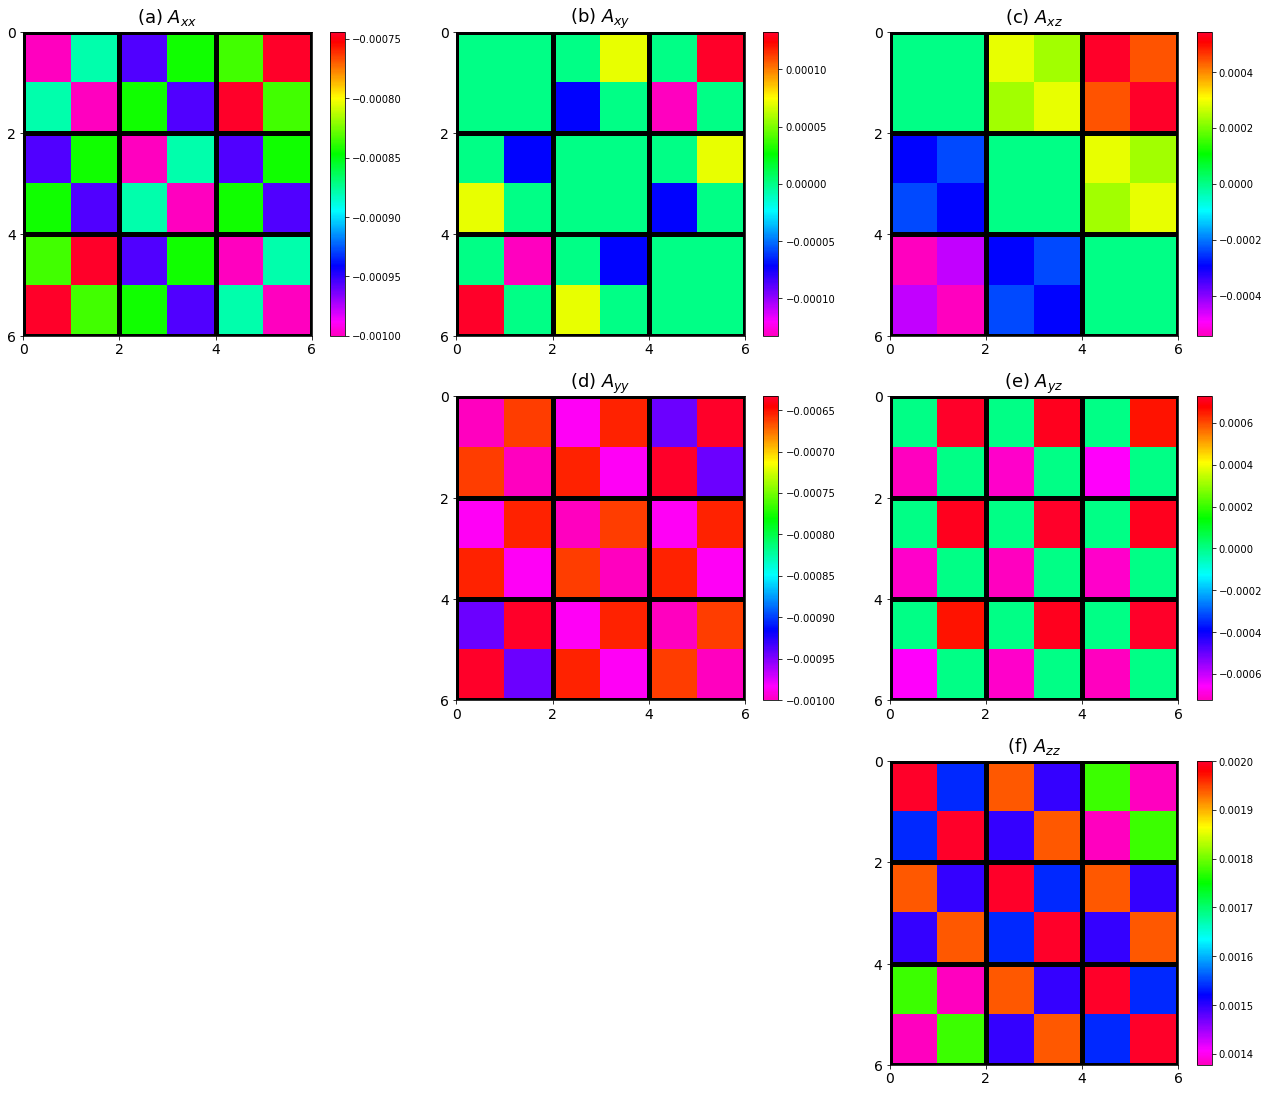

In [76]:
fig = plt.figure(figsize=(22,19))
fig.patch.set_facecolor('xkcd:white')

plt.subplot(331)
plt.title('(a) $A_{xx}$', y=1.01, x=0.5, fontsize=18)
plt.pcolormesh(yt, xt, Axx, cmap='gist_rainbow_r')
cb = plt.colorbar(shrink=1)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(np.arange(0, M+1, 2.0), fontsize=14)
plt.yticks(np.arange(0, N+1, 2.0), fontsize=14)
plt.grid(color = 'black', linestyle = '-', linewidth = 5)

plt.subplot(332)
plt.title('(b) $A_{xy}$', y=1.01, x=0.5, fontsize=18)
plt.pcolormesh(yt, xt, Axy, cmap='gist_rainbow_r')
cb = plt.colorbar(shrink=1)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(np.arange(0, M+1, 2.0), fontsize=14)
plt.yticks(np.arange(0, N+1, 2.0), fontsize=14)
plt.grid(color = 'black', linestyle = '-', linewidth = 5)

plt.subplot(333)
plt.title('(c) $A_{xz}$', y=1.01, x=0.5, fontsize=18)
plt.pcolormesh(yt, xt, Axz, cmap='gist_rainbow_r')
cb = plt.colorbar(shrink=1)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(np.arange(0, M+1, 2.0), fontsize=14)
plt.yticks(np.arange(0, N+1, 2.0), fontsize=14)
plt.grid(color = 'black', linestyle = '-', linewidth = 5)

plt.subplot(335)
plt.title('(d) $A_{yy}$', y=1.01, x=0.5, fontsize=18)
plt.pcolormesh(yt, xt, Ayy, cmap='gist_rainbow_r')
cb = plt.colorbar(shrink=1)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(np.arange(0, M+1, 2.0), fontsize=14)
plt.yticks(np.arange(0, N+1, 2.0), fontsize=14)
plt.grid(color = 'black', linestyle = '-', linewidth = 5)

plt.subplot(336)
plt.title('(e) $A_{yz}$', y=1.01, x=0.5, fontsize=18)
plt.pcolormesh(yt, xt, Ayz, cmap='gist_rainbow_r')
cb = plt.colorbar(shrink=1)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(np.arange(0, M+1, 2.0), fontsize=14)
plt.yticks(np.arange(0, N+1, 2.0), fontsize=14)
plt.grid(color = 'black', linestyle = '-', linewidth = 5)

plt.subplot(339)
plt.title('(f) $A_{zz}$', y=1.01, x=0.5, fontsize=18)
plt.pcolormesh(yt, xt, Azz, cmap='gist_rainbow_r')
cb = plt.colorbar(shrink=1)
plt.xlim(0,M)
plt.ylim(N,0)
plt.xticks(np.arange(0, M+1, 2.0), fontsize=14)
plt.yticks(np.arange(0, N+1, 2.0), fontsize=14)
plt.grid(color = 'black', linestyle = '-', linewidth = 5)

#plt.savefig('figures/mag_structure_y.jpg', dpi=500)